# DSCI 6008 4.3 Hypothesis Testing

## Bayesian Hypothesis Testing

Although classical statistics essentially limits us to trying to decide which model a datapoint fits best, the Bayesian setting allows us to discuss the **plausibility** of a given model in relation to another. This lecture discusses the implementation of this rather practical application of Bayesian statistics.

Suppose that we need to decide between two hypotheses $H_{0}$ and $H_{1}$. According to Bayes' law, we can determine the posterior probabilities of $H_{0}$ and $H_{1}$, given that we have an accurate calculation of the prior probability mass function $P(H_{0}) = p_{0}$ and $P(H_{1}) = p_{1}$ such that $p_{0}+p_{1} = 1$:

$$P(\ H_{0}\ |\ Y=y) = \dfrac{f_{Y}(y\ |\ H_{0})P(H_{0})}{f_{Y}(y)}$$

$$P(\ H_{1}\ |\ Y=y) = \dfrac{f_{Y}(y\ |\ H_{1})P(H_{1})}{f_{Y}(y)}$$


### MAP Hypothesis Test

One way to decide between the two hypotheses is to take the hypothesis with the higher posterior probability. This is the quintessential idea between the *MAP hypothesis test*. Specifically we choose $H_{0}$ over $H_{1}$ iff

$$P(\ H_{0}\ |\ Y=y)  \geq P(\ H_{1}\ |\ Y=y)$$

in a more practical sense, we can write

$$f(y\ | \ H_{0}\)P(H_{0}) \geq f(y\ | \ H_{1}\)P(H_{1})$$

We can substitute the PMF for the PDF, of course, where necessary.

#### Example

Recall our previous example where a signal $X$ is transmitted over a noisy channel $Y$, with additive noise term $W$:

$$Y = X+W$$

Let's say that the value of $X$ varies between $0$ and $1$ (binary) and we need to decide which it is by observing the value of $y$ (say y is *not* binary in this case, so a problem very much like a real noisy channel). 

A value of $y \neq 0$ arrives. We have two hypotheses:

$$H_{0}: X = 1$$

$$H_{1}: X = 0$$

Now we test both hypotheses:

Under $H_{0}$, $Y = 1+W$ therefore $Y\ |\ H_{0} \sim N(1, \sigma^{2})$

Under $H_{1}$, $Y = W$ therefore $Y\ |\ H_{1} \sim N(0, \sigma^{2})$

$H_{0}$ is chosen iff:

$$\dfrac{1}{\sigma \sqrt{2\ \pi}}e^{\dfrac{(y-1)^{2}}{2 \sigma^{2}}}P(H_{0}) \geq \dfrac{1}{\sigma \sqrt{2\ \pi}}e^{\dfrac{(y)^{2}}{2 \sigma^{2}}}P(H_{1}) $$

Here's where it gets a little sticky. We have to understand the system well enough to figure out values for $P(H_{0})$ and $P(H_{1})$. Let's assume this is much like a Bernoulli parameter, with $P(H_{0}) = \theta$ and $P(H_{1}) = 1-\theta$. Now we substitute and simplify the equation as follows:

$$\dfrac{e^{-\dfrac{(y-1)^{2}}{2\ \sigma^{2}}}}{e^{-\dfrac{(y)^{2}}{2\ \sigma^{2}}}} \geq \dfrac{1-\theta}{\theta}$$


$$e^{-\dfrac{(y-1)^{2}+y^{2}}{2\ \sigma^{2}}} \geq \dfrac{1-\theta}{\theta}$$

$$e^{\dfrac{-y^{2}+2y-1+y^{2}}{2\ \sigma^{2}}} \geq \dfrac{1-\theta}{\theta}$$

$$e^{\dfrac{2y-1}{2\ \sigma^{2}}} \geq \dfrac{1-\theta}{\theta}$$

Therefore we choose $H_{0}$ iff

$$y \geq \sigma^{2} \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2}$$


**Protip** Note that the average error probability (mean chance of finding an error) can be calculated as sum of the conjugate probabilities for each hypothesis. This is to say that:

$$P_{e} = P(choose H_{0}\ |\ H_{1})P(H_{1})+P(choose H_{1}\ |\ H_{0})P(H_{0}) $$


This figure allows us to determine an approximate probability of type I (false positive or the first term) and type II errors (false negative or the second term).

In the above case, we agreed that we choose $H_{0}$ iff:

$$y \geq c$$

Where $c = \sigma^{2} \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2}$ is given above as a coefficient. 

So in order to determine:

$$P(\text{choose}\ H_{1}\ |\ H_{0}) = P(Y < c\ |\ H_{0})$$

the probability of observing this value given $H_{0}$ and following the normal distribution, is the cumulative probability (normal distribution function) that the value of y will at a value less than c for a normal function whose $\mu = 1$ and $\sigma = \sigma$. We can convert the whole right hand side above into a z-score for $y|\ H_{0} \sim N(1, \sigma^{2})$ and compute the probability of finding the z-score

$$ = \Phi\left(\dfrac{c-1}{\sigma}\right) $$

we can also calculate the other term in exactly the same way (this is the type II or false negative) $y|\ H_{1} \sim N(0, \sigma^{2})$ Again this is the alternate hypothesis that y = 0.

$$P(\text{choose}\ H_{0}\ |\ H_{1}) = P(Y \geq c\ |\ H_{1})$$

$$ = 1-\Phi\left(\dfrac{c}{\sigma}\right)$$

Putting both together using the parameter $\theta$:

$$P_{e} = P(\text{choose}\ H_{0}\ |\ H_{1})P(H_{1})+P(\text{choose}\ H_{1}\ |\ H_{0})P(H_{0})$$

$$ =  (1-\theta) \cdot \Phi\left( \sigma \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2\ \sigma}\right) + \theta \cdot \Phi\left( \sigma \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2\ \sigma} - 1  \right) $$


### Minimum Cost Hypothesis Test

The minimum cost hypothesis test addresses the notion that the acceptance of one hypothesis will ultimately **cost** or **risk** more than the other. For example, rejecting the handshake of a hacker's computer $P_{reject}(H_{0}) $is well worth the risk of ticking off a few customers $P_{accept}(H_{1})$ to a bank. 

In order to perform an analysis of the rist, we need to employ the **minimum cost hypothesis test**. Here we assign a specific **cost** to each error type:

$C_{10}$ The cost of choosing $H_{1}$ given that $H_{0}$ is true

$C_{01}$ The cost of choosing $H_{0}$ given that $H_{1}$ is true

The average cost $C$ can now be associated to the error rate:

$$C = C_{10}P(\text{choose}\ H_{1}\ |\ H_{0})P(H_{0})+C_{01}P(\text{choose}\ H_{0}\ |\ H_{1})P(H_{1})$$




### Credible Intervals



### MAP Hypothesis Test

One way to decide between the two hypotheses is to take the hypothesis with the higher posterior probability. This is the quintessential idea between the *MAP hypothesis test*. Specifically we choose $H_{0}$ over $H_{1}$ iff

$$P(\ H_{0}\ |\ Y=y)  \geq P(\ H_{1}\ |\ Y=y)$$

in a more practical sense, we can write

$$f(y\ | \ H_{0})P(H_{0}) \geq f(y\ | \ H_{1})P(H_{1})$$

We can substitute the PMF for the PDF, of course, where necessary.

#### Example

Recall our previous example where a signal $X$ is transmitted over a noisy channel $Y$, with additive noise term $W$:

$$Y = X+W$$

Let's say that the value of $X$ varies between $0$ and $1$ (binary) and we need to decide which it is by observing the value of $y$ (say y is *not* binary in this case, so a problem very much like a real noisy channel). 

A value of $y \neq 0$ arrives. We have two hypotheses:

$$H_{0}: X = 1$$

$$H_{1}: X = 0$$

Now we test both hypotheses:

Under $H_{0}$, $Y = 1+W$ therefore $Y\ |\ H_{0} \sim N(1, \sigma^{2})$

Under $H_{1}$, $Y = W$ therefore $Y\ |\ H_{1} \sim N(0, \sigma^{2})$

$H_{0}$ is chosen iff:

$$\dfrac{1}{\sigma \sqrt{2\ \pi}}e^{\dfrac{(y-1)^{2}}{2 \sigma^{2}}}P(H_{0}) \geq \dfrac{1}{\sigma \sqrt{2\ \pi}}e^{\dfrac{(y)^{2}}{2 \sigma^{2}}}P(H_{1}) $$

Here's where it gets a little sticky. We have to understand the system well enough to figure out values for $P(H_{0})$ and $P(H_{1})$. Let's assume this is much like a Bernoulli parameter, with $P(H_{0}) = \theta$ and $P(H_{1}) = 1-\theta$. Now we substitute and simplify the equation as follows:

$$\dfrac{e^{-\dfrac{(y-1)^{2}}{2\ \sigma^{2}}}}{e^{-\dfrac{(y)^{2}}{2\ \sigma^{2}}}} \geq \dfrac{1-\theta}{\theta}$$


$$e^{-\dfrac{(y-1)^{2}+y^{2}}{2\ \sigma^{2}}} \geq \dfrac{1-\theta}{\theta}$$

$$e^{\dfrac{-y^{2}+2y-1+y^{2}}{2\ \sigma^{2}}} \geq \dfrac{1-\theta}{\theta}$$

$$e^{\dfrac{2y-1}{2\ \sigma^{2}}} \geq \dfrac{1-\theta}{\theta}$$

Therefore we choose $H_{0}$ iff

$$y \geq \sigma^{2} \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2}$$


**Protip** Note that the average error probability (mean chance of finding an error) can be calculated as sum of the conjugate probabilities for each hypothesis. This is to say that:

$$P_{e} = P(choose H_{0}\ |\ H_{1})P(H_{1})+P(choose H_{1}\ |\ H_{0})P(H_{0}) $$


This figure allows us to determine an approximate probability of type I (false positive or the first term) and type II errors (false negative or the second term).

In the above case, we agreed that we choose $H_{0}$ iff:

$$y \geq c$$

Where $c = \sigma^{2} \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2}$ is given above as a coefficient. 

So in order to determine:

$$P(\text{choose}\ H_{1}\ |\ H_{0}) = P(Y < c\ |\ H_{0})$$

the probability of observing this value given $H_{0}$ and following the normal distribution, is the cumulative probability (normal distribution function) that the value of y will at a value less than c for a normal function whose $\mu = 1$ and $\sigma = \sigma$. We can convert the whole right hand side above into a z-score for $y|\ H_{0} \sim N(1, \sigma^{2})$ and compute the probability of finding the z-score

$$ = \Phi\left(\dfrac{c-1}{\sigma}\right) $$

we can also calculate the other term in exactly the same way (this is the type II or false negative) $y|\ H_{1} \sim N(0, \sigma^{2})$ Again this is the alternate hypothesis that y = 0.

$$P(\text{choose}\ H_{0}\ |\ H_{1}) = P(Y \geq c\ |\ H_{1})$$

$$ = 1-\Phi\left(\dfrac{c}{\sigma}\right)$$

Putting both together using the parameter $\theta$:

$$P_{e} = P(choose H_{0}\ |\ H_{1})P(H_{1})+P(choose H_{1}\ |\ H_{0})P(H_{0})$$

$$ =  (1-\theta) \cdot \Phi\left( \sigma \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2\ \sigma}\right) + \theta \cdot \Phi\left( \sigma \ln{\dfrac{1-\theta}{\theta}}+\dfrac{1}{2\ \sigma} - 1  \right) $$


### Minimum Cost Hypothesis Test

The minimum cost hypothesis test addresses the notion that the acceptance of one hypothesis will ultimately **cost** or **risk** more than the other. For example, rejecting the handshake of a hacker's computer $P_{reject}(H_{0}) $is well worth the risk of ticking off a few customers $P_{accept}(H_{1})$ to a bank. 

In order to perform an analysis of the rist, we need to employ the **minimum cost hypothesis test**. Here we assign a specific **cost** to each error type:

$C_{10}$ The cost of choosing $H_{1}$ given that $H_{0}$ is true

$C_{01}$ The cost of choosing $H_{0}$ given that $H_{1}$ is true

The average cost $C$ can now be associated to the error rate:

$$C = C_{10}P(choose H_{1}\ |\ H_{0})P(H_{0})+C_{01}P(choose H_{0}\ |\ H_{1})P(H_{1})$$

Here we can apply a rule much like the MAP decision rule, subsituting likelihoods for the dependent terms:

$$ f(y |\ H_{0})P(H_{0})C_{10} \geq f(y |\ H_{1})P(H_{1})C_{01}$$

Simplifying we can write that we choose $H_{0}$ iff 

$$\dfrac{f_{Y}(y|\ H_{0})}{f_{Y}(y|\ H_{1})} \geq \dfrac{P(H_{1})C_{01}}{P(H_{0})C_{10}}$$

We can equivalently choose $H_{0}$ iff

$$P(H_{0}|y)C_{10} \geq P(H_{1}|y)C_{01}$$


#### Example

An alarm system has two possible outcomes if it is triggered:

$$H_{0}: \text{False Alarm}$$

$$H_{1}: \text{True Alarm}$$

The system notifies the authorities if it accepts $H_{1}$. The system detects activity at several detectors and makes a computation that $P(H_{1}|y) = 0.005$. Suppose that the cost of missing an intruder is 1000 times the cost of a false alarm (like a prison). Should the system send an alarm message $H_{1}$?

Note that:

$$P(H_{0}|y) = 1-P(H_{1}|y) = 0.995$$

The posterior risk of accepting $H_{1}$ is:

$$P(H_{0}|y)C_{10} = 0.995 \cdot C_{10}$$

We have $C_{01} = 1000C_{10}$, so the posterior risk of accepting $H_{0}$ is 

$$P(H_{1}|y)C_{01} = 0.005(1000 \cdot C_{10})$$
$$ = 5*C_{10}$$

$$P(H_{1}|y)C_{01} > P(H_{0}|y)C_{10}$$, we accept that $H_{1}$ is true, so an alarm message is sent.

### Credibility (Credible) Intervals

So far we've been building the intuition that we can use the Bayesian setting to predict the outcome of a future experiment. From this idea arises the notion of **credibility**. A credible interval is an interval in the domain of a posterior probability distribution (or posterior predictive) used to determine the validity of an observation. This is a **direct analogue to confidence intervals in frequentist statistics.**

A credibility interval is defined as follows:

Given the observation $Y = y$, the interval $\left[a, b \right]$ is said to be a $(1-\alpha)\cdot100\%$ **credible interval** for $X$, iff the posterior probability of $X$ being in $\left[a, b \right]$ is equal to $(1-\alpha)$; i.e.:

$$P(a \geq X \geq b |\ Y=y) = 1-\alpha$$ 

Credible intervals can be calculated *a posteriori* from tables of data or can be calculated analytically from  distributional relationships.

#### Example

Let $X$ and $Y$ be *jointly distributed* normal variables, s.t. $X \sim N(2, \sigma^{2} = 1)$; $Y \sim N(1, \sigma^{2} = 4)$ and the density of overlap $\rho(X, Y) = \frac{1}{2}$. We observe a new value of $y=3$. Find the $95\%$ credible interval given this information.

We need to start with some information from the [supplied handouts](./Bivariate-Normal.pdf). The posterior predictive expectation value is:

$$E\left[X|\ Y = y\right] = \mu_{X} + \rho \sigma_{X}\dfrac{y-\mu_{Y}}{\sigma_{Y}}$$

$$Var\left[X|\ Y = y\right] = (1-\rho^{2})\sigma_{X}^{2}$$

$$E\left[X|\ Y = y\right] = 2 - \frac{1}{2} \cdot \frac{3-1}{2} = 1.5$$

$$Var\left[X|\ Y = y\right] = \left(1-\frac{1}{4}\right) \cdot 1.5 = \dfrac{3}{4}\cdot\dfrac{3}{2} = \dfrac{9}{8}$$

Here $\alpha = 0.05$ (similar to a p-value), so we need:

$$P(a \geq X \geq b |\ Y = 2) = 0.95$$

**As in frequentist statistics, it is common to choose a symmetric interval around the expected value.** In this case, the expected value is $\frac{3}{2}$.

$$\left[\frac{3}{2}-c, c+\frac{3}{2} \right]$$

Thus we need to have:

$$P\left(\frac{3}{2}-c \geq X \geq c+\frac{3}{2} |\ Y = 2\right) = \Phi\left(\frac{c}{\sqrt{\frac{9}{8}}}\right)-\Phi\left(\frac{-c}{\sqrt{\frac{9}{8}}}\right) = 2\Phi\left(\frac{c}{\sqrt{\frac{9}{8}}}\right)-1 = 0.95$$

$$c = \sqrt{\frac{9}{8}}\Phi^{-1}\left(0.975\right) \approx 2.08$$

This leads to a credibility interval of:

$$\left[-0.58, 3.58\right]$$

In [13]:
from scipy.stats import norm
((9./8.)**(0.5))*norm.ppf(1.95/2.)


2.0788557365245164

All this being said, however, the credibility intervals can be calculated from a (previously collected) table of values, simply taking the fraction probability that $X$ lands between values for a given value $y$. On a table where $X$ are the features and $y$ are the data points, we look for averages of $X$ amongst rows.
For example, in an experiment that determines the uncertainty distribution of parameter $t$ , if the probability that t lies between 20 and 50 is 0.95, then $20 \geq t \geq 50$ is a 95% credible interval.

## Introduction to the Bayes Factor

The Bayes' Factor, besides being a fantastic candidate as the potential name of a new data-science gameshow, is a very useful measure of model credibility in the form of a simple MAP-like hypothesis test. 

In this case, we are selecting a model $M$ (this can be a machine learning model or a simple estimate) based on its posterior probability given a fresh set of data $D$:

$$P(M\ |\ D) = \dfrac{P(D\ |\ M)P(M)}{P(D)}$$

Here we can treat a model selection between two models $M_{1}$ and $M_{2}$:

$$K = \dfrac{P(D|M_{1})}{P(D|M_{2})} = \dfrac{\int_{\theta}P(D|\theta_{1},M_{1})P(\theta_{1}|M_{1})d\theta_{1}}{\int_{\theta}P(D|\theta_{2},M_{1})P(\theta_{1}|M_{2})d\theta_{2}}$$

Here, $K$, is by definition, the **Bayes Factor**. It is a relative measure in credibility between two models given the data we have observed. 

#### Example:

Returning to the coin flip example, let's construct two models (using the actual definition of a model, corresponding to a hypothesis):

$M_{1}$: The coin is absolutely fair, and we are certain of it. Thus we model this by $P(H) = 0.5$, so that the Bernoulli parameter $\theta = \frac{1}{2}$:

$$P(M_{1}) = {{n}\choose{k}}\theta^{n} $$

$M_{2}$: The coin may not be fair. We need to determine the parameters based on a uniform prior parameter $\theta \in \left[0,1\right]$

$$P(M_{2}) = \int_{0}^{1}{{n}\choose{k}}\theta^{k}(1-\theta)^{n-k}d\theta $$

Suppose we flip the coin 100 times and get 61 heads. Calculating the posteriors for each:

$$M_{1} = {{100}\choose{61}}{\frac{1}{2}}^{100} = 0.0071$$

$$M_{2} = {{100}\choose{61}}\int_{0}^{1}{q}^{61}(1-q)^{39}dq$$

$$= \dfrac{\Gamma(m+1)\Gamma(n-m+1)}{\Gamma(n+2)} = \dfrac{n!}{m!(n-m)!}\cdot\dfrac{m!(n-m)!}{(n+1)!} $$

$$= \dfrac{n!}{m!(n-m)!}\cdot\dfrac{m!(n-m)!}{(n+1)!} = \dfrac{n!}{(n+1)!} = \dfrac{1}{n+1}$$

$$M_{2} = 0.01$$

The Bayes factor is slightly in favor of the second model. Normally we use a table given in the [literature](https://books.google.com/books?id=vh9Act9rtzQC&printsec=frontcover#v=onepage&q&f=false) to determine the meaning of the Bayes factor:


|K                | Strength of Evidence    |
|-----------------|:-----------------------:|
| < 1             | negative (supports M2)  |
| to 5            | barely worth mentioning |
|5 to 10          | substantial             |
|10 to 50         | strong                  |
|50 to 100        | very strong             |
|> 100            | decisive                |

in this case it looks like $M_{2}$ is weakly supported here. 


## ML Model Selection with Bayesian Criteria

There are two important criteria for machine learning models that enable us to compute an approximation to the Bayes' factor for all of them. These are the **AIC**, the Aikake information criterion, and the **BIC** the Bayesian information criterion. 

### AIC and AIC corrected (AICc)

AIC is founded in information theory. It supposes that the data is generated by some unknown process (distribution free) f. We consider two candidate models to represent f: g1 and g2. If we knew f, then we could find the information lost from using g1 to represent f by calculating the degree to which the two distributions (f and g1) match using information theory; similarly, the information lost from using g2 to represent f can be found similarly. We then choose the candidate model that minimizes the loss of information. The AIC is given as:

$$ AIC = 2k - 2\ ln{(P(D|M_{i}))} $$

Where $k$ is the number of parameters $P(D|M_{i})$ is the likelihood for the model given the current set of data. In machine learning parlance, this likelihood is taken as the final "loss" (cost) function value for the model's optimized set of parameters. For finite sample sizes, we must correct for the effect of the limits of sampling size $n$.

$$ AICc = AIC + \dfrac{2k(k+1)}{(n-k-1)} $$

([from wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion))
To apply AIC in practice, we start with a set of candidate models, and then find the models' corresponding AIC values. There will almost always be information lost due to using a candidate model to represent the "true" model (i.e. the process that generates the data). 

We wish to select, from among the candidate models, the model that minimizes the information loss. We cannot choose with certainty, but we can minimize the estimated information loss.

Suppose that there are M candidate models. Denote the AIC values of those models by $AIC_{1}, AIC_{2}, AIC_{3}, \cdots, AIC_{M}$. Let $AIC_{min}$ be the minimum of those values. Then $P_{i}(AIC) = exp^{{\frac{AIC_{min} − AIC_{i}}{2}}}$ can be interpreted as the relative probability that the ith model minimizes the (estimated) information loss

## BIC

BIC can be derived from AIC, although it comes from a different theoretical origin than AIC. It suffers from sample bias just as AIC (not AICc) does. 

The BIC generally penalizes free parameters more strongly than the Akaike information criterion, though it depends on the size of $n$ and relative magnitude of $n$ and $k$.

It is important to keep in mind that the BIC can be used to compare estimated models only when the numerical values of the dependent variable are identical for all estimates being compared.

The BIC for a particular model $i$ is given as:

$$ BIC = -2 ln{\left(P(D|M_{i})\right)} + k\ ln{(n)} $$



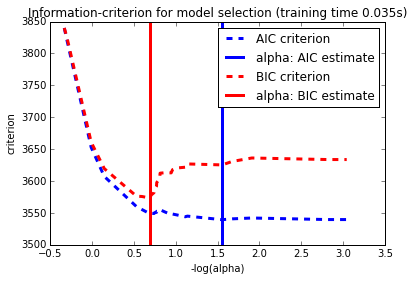

In [21]:
%matplotlib inline
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

X /= np.sqrt(np.sum(X ** 2, axis=0))

##############################################################################
### LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_[:-1]), criterion_[:-1], '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)